# Predicting Insurance Costs with Multiple Linear Regression

# Project Introduction

This project will attempt to train a Machine Learning model that is capable of predicting insurance costs when given patient information (age, sex, bmi, number of children, and region of residence).

# Importing our Data

In [87]:
# Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Importing our dataset
raw = pd.read_csv('./insurance.csv')

In [3]:
# This data was found on Kaggle: https://www.kaggle.com/mirichoi0218/insurance

# Exploratory Data Analysis

Before we can create a ML model capable of making predictions with our data, we need to understand our data. The goal of Exploratory Data Analysis is to gain a general idea of the types and format of data present in our dataset, and a very basic understanding of our dataset as a whole. During this process, we may also spot aspects of our data that need to be addressed in Data Cleaning as Machine Learning models typically require data to be in a very specific format.

In [4]:
# Taking a look at the general format of our data

raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Checking how many total rows and columns are in our dataset

raw.shape #1338 rows/records and 7 columns/features

(1338, 7)

In [6]:
# General overview of the types of data stored in our dataset (data-types and non-null counts)

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Basic statistical descriptions of our numeric columns

raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
# Looking at just our column datatypes

raw.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Data Cleaning

After performing Exploratory Data Analysis, it is now time for Data Cleaning. The goal of the Data Cleaning process is to prepare our data in a way that is compatible with Machine Learning models. This can include resolving inconsistent formatting (misspellings, incorrect data-types, and other issues that hinder our model from interacting properly with the data), removing duplicates (if the exact same information is present multiple times, that can skew our data and our final models ability to make accurate predictions), and most importantly: filling missing data. Most Machine Learning models are incapable of working with missing data so those instances need to be either filled or removed completely (these decisions are made with the help of domain experts).

## Fix inconsistent formatting

Inconsistent formatting is typically seen in data with the 'object' data-type which can refer to strings/text, combinations of letters and numeric characters, or data that may not be stored as the appropriate data-types due to errors while recording or uploading data. To find and resolve these formatting issues, we'll be looking at the unique values in each of our 'object' columns. Inconsistencies such as misspelling, varying letter casing, extra whitespace, etc., can cause data values that refer to the same thing to be recorded separately. If fed into our model as is, this can cause data leakage and inaccurate predictions as our model was trained on an inaccurate representation of our meaningful data.

In [9]:
# Unique values in 'sex' column
raw['sex'].unique()

# it looks like there are only two unique values and no issues with spelling nor formatting

array(['female', 'male'], dtype=object)

In [10]:
# Unique values in 'smoker' column
raw['smoker'].unique()

# no apparent problems with formatting here (differences in uppercase vs. lowercase, misspellings, etc.)

array(['yes', 'no'], dtype=object)

In [11]:
# Unique values in 'region'
raw['region'].unique()

# no spelling or case inconsistencies

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Remove duplicates

After we have resolved any formatting inconsistencies, it is now time to remove instances of duplicate data. We want to do this process after handling misspellings and other issues so we can identify records in our dataset that relate to the same object or signal. If we were to leave these duplicates in our dataset when training our model, this would result in a skewed representation of our real data (causing our model to be trained on an unrealistic representation of real-world data). It is important we identify and remove any duplicates present in our current dataset.

In [12]:
# Identifying duplicates

# This method in combination with keep='first' identifies any records that contain duplicate values in EVERY column (after
# the first instance). Those records are returned as 'True' while other records are returned as 'False'.

raw.duplicated(keep='first').value_counts()

# it looks like we have one duplicate in our dataset (using keep='first' excludes the first element in each duplicate set)

False    1337
True        1
Name: count, dtype: int64

In [13]:
# Let's see which row that is

raw[raw.duplicated()]

# This row being returned means that there is another record in our dataset (before this one) that contains the same values in
# every column. 

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
# Let's verify that there is more than one row with these exact values

raw[(raw['age']==19) & (raw['sex']=='male') & (raw['bmi']==30.59)]

# as we can see, we have two rows that contain the exact same value for every feature. Without a field indicating the name of 
# each patient or some form of unique patient identifier, we can't be sure that these two rows are really duplicates.
# Regardless, removing the one duplicate row would probably not have a significant effect on the rest of our data (1337 other
# rows), so let's go ahead and remove the one duplicate.

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
# Removing the duplicate row

raw = raw.drop_duplicates(keep='first')

In [16]:
# Checking how many duplicate rows we have now

raw.duplicated().value_counts() # Now we have no True values indicating all duplicates are removed

False    1337
Name: count, dtype: int64

In [17]:
# If the drop duplicates worked, we should have one less row in our total dataset (1338-1=1337). Let's confirm that.

len(raw) # As expected, we now have 1337 records in our dataset instead of the original 1338.

1337

In [18]:
# Finally, let's repeat the query we made above to view the duplicated rows. Now, only one row should be returned.

raw[(raw['age']==19) & (raw['sex']=='male') & (raw['bmi']==30.59)]

# Only one row was returned, so can be sure that our duplicate row was removed.

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


## Identify Missing data

The next step in the Data Cleaning process is to identify missing data. Intuitively, training our machine model requires that it forms relationships between each of our independent features and our target outcome (the 'charges' column in this case which represents total insurance costs). To do this, our model observes how well changes in the values of each independent feature column explains changes in our target outcome. Training a good model (especially when data is very complex and has many records and possible features for each one) takes resources (time, space, and money). If one of our columns was filled with missing data, it would not make sense to train our model with it as there is too little information to observe a relationship between those values and our target outcome. Often the existence of missing values indicates human error during the data recording process. It doesn't always mean the value is unknown, but might rather be conveying information in itself (perhaps implying a value of 0 or none for a feature that tracks quantity). In those cases, the Machine Learning Engineer will work together with a Domain Expert (relating to our dataset) to identify the best ways of filling any missing data using a variety of methods. Once all possible values are filled, remaining missing data must be removed as most models are simply incapable of being trained on them (in most cases).

In [19]:
# Now let's identify any columns with missing data.

raw.isnull().sum().sort_values()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

It looks like none of our columns have missing data. If they did, we would have to handle those cases by either dropping columns, filling the missing values, or dropping rows (since we can't have missing values in our Machine Learning model).

## Handle Missing Data

Since in our previous step we didn't return any instances of missing data, this step is already completed. If there were missing values present in our dataset, we likely wouldn't possess the knowledge needed to decide how to fill them. We would need to consult with a domain expert (possible an insurance agent or medical expert) to decide how we can approximate those missing values in a way that still accurately represents the information within so our model can make accurate predictions based on it.

# Visualization

Now that our data is in a form that is without duplicates or formatting issues, and also has no missing values, we proceed to Visualization. The goal of this process is to gain a better understanding of how values and features of our data are represented in the dataset. We also seek to learn about the relationships between each independent feature and our target outcome so we can choose the appropriate model. 

## Visualizing the distribution of features in our dataset

The first step is to visualize the distributions of each feature within our dataset. This includes the column of outcomes we are trying to predict (charges) as well as the other independent features (other columns). We want to know if different values have relatively the same frequencies, if values are concentrated together, and the ranges of values that exist in our dataset.

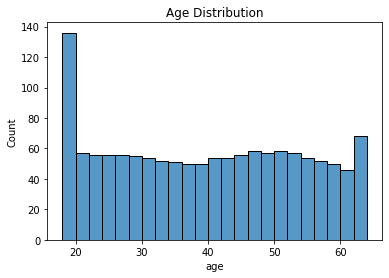

In [20]:
# Visualizing the distribution of age

plt.title('Age Distribution')
sns.histplot(x=raw['age'], bins=23)
plt.show()

# Since the data-type of the age columns is 'int' we know we are dealing with discrete quantitative data.

# It appears we have a relatively even distribution of values for this feature with the exception of a large concentration
# of values below the age of 20. 

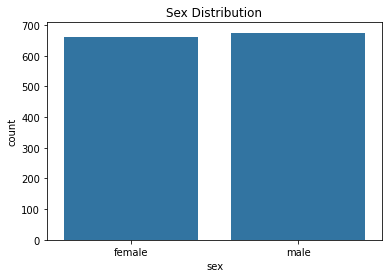

In [21]:
# Visualizing the distribution of sex

plt.title('Sex Distribution')
sns.countplot(x=raw['sex'])
plt.show()

# With our 'sex' column having a data-type of 'object' (or string) we can see that this column represents categorical data.

# We can see that there are only two distinct values {male, female} and each one holds relatively the same importance,
# so we know we are looking at symmetric binary qualitative data. Each value has roughly the same count in our dataset
# so they are equally disributed.

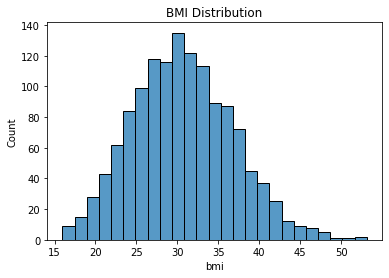

In [22]:
# Visualizing the distribution of bmi

plt.title('BMI Distribution')
sns.histplot(x=raw['bmi'])
plt.show()

# The data-type of this column is 'float' so we know this feature represents continuous quantitative data.
# By drawing the Kernel-Density Estimation (KDE), we can see the values are normally distributed.

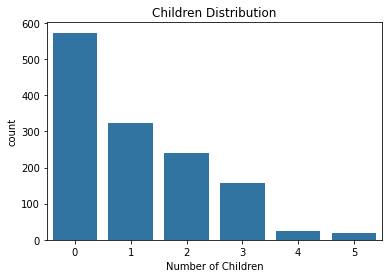

In [23]:
# Visualizing the distribution of children

plt.title('Children Distribution')
sns.countplot(x=raw['children'])
plt.xlabel('Number of Children')
plt.show()

# The data-type of this column is 'int' but it contains more than 2 possible values so it can refer either to discrete
# quantitative data or ordinal qualitative data (if it only had two values such as 0 and 1 it would be binary qualitative data).

# The possible values for number of children are not countably infinite so we can say that this feature represents ordinal 
# qualitative data (there are different categories and there is a natural ordering between these values - we can compare the 
# number of children people have as being more or less).

# By visualizing the relative distribution of each possible value, we can see that the values are unevenly distributed.
# Values representing lower numbers of children are more frequent in the dataset compared to those of higher numbers.

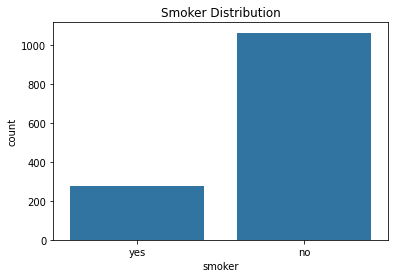

In [24]:
# Visualizing the distribution of smoker

plt.title('Smoker Distribution')
sns.countplot(x=raw['smoker'])
plt.show()

# The data-type of this column is 'object' and there are only 2 possible values so we know we are looking at binary 
# qualitative data. It can be said that a value of 'yes' is more important than a value of 'no' in this case so we can say
# that this feature represents asymmetric binary qualitative data.

# There is an unequal distribution of values in this feature as there are much more 'no' values compared to 'yes' values.

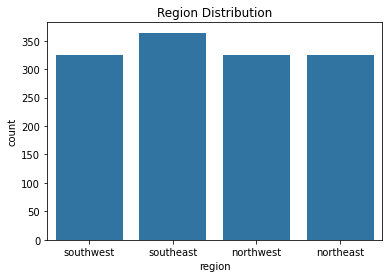

In [25]:
# Visualizing the distribution of region

plt.title('Region Distribution')
sns.countplot(x=raw['region'])
plt.show()

# The data-type of this column is 'object' and there are 4 possible values. There is no natural ordering of these values so 
# this feature represents nominal qualitative data.

# The values in this feature are equally distributed as they all have similar frequencies in this dataset. The value of 
# 'southeast' has a sligthly higher frequency than the others.

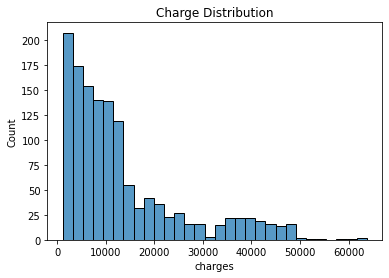

In [26]:
# Visualizing the distribution of charges

plt.title('Charge Distribution')
sns.histplot(x=raw['charges'], bins=30)
plt.show()

# The data-type of this column is 'float' so this feature represents continuous quantitative data.

# It appears the values in this feature are not normally distributed but rather positively-skewed (right-skewed).
# Lower values of 'charges' have much higher frequencies in this dataset compared to higher values. 

## Visualizing the correlation of columns to our target outcome (charges)

Now that we have an understanding of how the values of each feature are distributed in our dataset, we want to pay closer attention to the relationship between each independent feature and our target outcome. We are looking to see how well the behavior of each feature can explain the behavior of insurance costs. The observation of that behavior or relationship between features is known as correlation. Features that are highly correlated to our outcome will have a higher overall impact in our final model when making predictions.

In [27]:
# Using Pandas .corr() method. Unfortunately, this only works for numeric features.

raw.corr(numeric_only = True)['charges'].drop('charges')

age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64

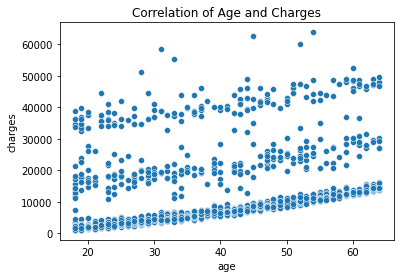

In [28]:
# Age

plt.title("Correlation of Age and Charges")
sns.scatterplot(x=raw['age'], y=raw['charges'])
plt.show()

# This scatterplot illustrates a very interesting relationship between 'age' and 'charges'. We can see a general behavior of
# charges increasing as age increases. However, we can also observe these separated groups of points. Disregarding the
# outliers, it seems that for each age there is a range of 400000 values which the charge can be found in. As age increases,
# this general range of charge also appears to increase. The existence of these separated bands or groups imply that there 
# may be another important feature that is contributing to this relationship.

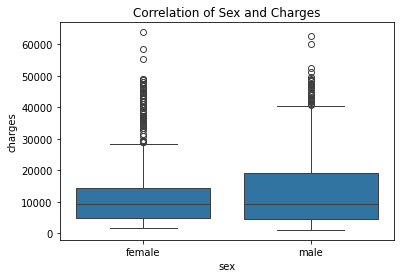

In [29]:
# Sex

plt.title("Correlation of Sex and Charges")
sns.boxplot(x=raw['sex'], y=raw['charges'])
plt.show()

# Since the 'sex' feature represents categorical data, we use a box plot to observe the relationship with charges. 
# The main body of these plots (the boxes) contain the interquartile range of the values. The horizontal lines indicate
# the minimum and maximum values while the diamonds indicate outliers. 

# If we include the outliers, both males and females seem to stay in the same relative range of charges. However, if we 
# remove the outliers, we can see that males can expect a slighly larger range (the horizontal line indicating the maximum
# value is higher than that of the female category). The main box body indicating the interquartile range is perhaps
# the most important feature we should be looking at. It appears that both categories have relatively the same first quartile
# and median value while the male category has a slightly higher third quartile value.

# Overall, the ranges seem to be relatively similar between categories but it can be said that males have a slighlty larger
# range of expected charges than females.

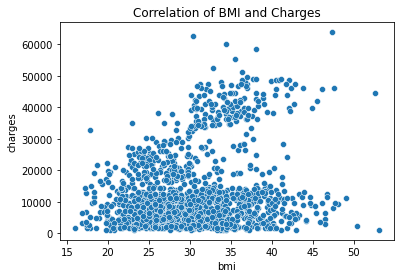

In [30]:
# BMI

plt.title("Correlation of BMI and Charges")
sns.scatterplot(x=raw['bmi'], y=raw['charges'])
plt.show()

# Since BMI represents a quantitative variable, we use a scatterplot to visualize the relationship with charges.
# We can see that the left side of our plot has a tighter concentration of points compared to the right side. 
# A general trend we can explain is that as bmi increases, the range of possible charges values also increase.
# Regardless of bmi value, there remains many values for charges concentrated between 0 and 20000. As bmi increases, the range
# of charges also increases and once the bmi surpasses ~30, it appears that a separate higher charge group appears with values
# concentrated between 30000 and 50000. Perhaps there is another feature that explains the appearance of that second cluster.

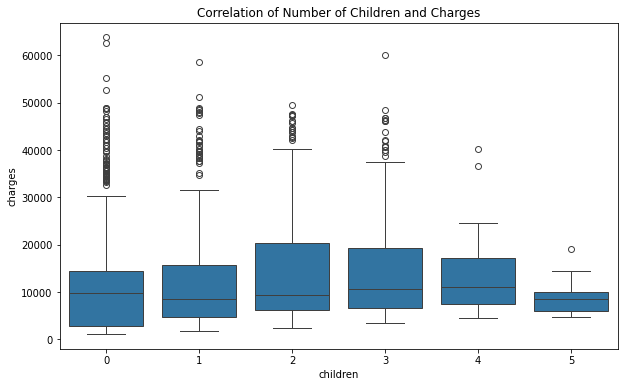

In [31]:
# Children 

plt.figure(figsize=(10,6))
plt.title("Correlation of Number of Children and Charges")
sns.boxplot(x=raw['children'], y=raw['charges'])
plt.show()

# Since 'children' is a categorical column, we use boxplots to observe the relationship with 'charges'.
# The interquartile range (middle 50% of data) for each possible value of 'children' appear to be relatively the same.
# The lower values of children have much more outliers than higher values. Children values of {2,3} have higher third-quartile
# values than the other categories. Between values of 0 and 3, the general trend is that higher values for children relate
# to larger ranges of charges. Values for children that are higher than 3 have smaller ranges than the rest and are located
# near the bottom of the plot (lower possible values for charges).

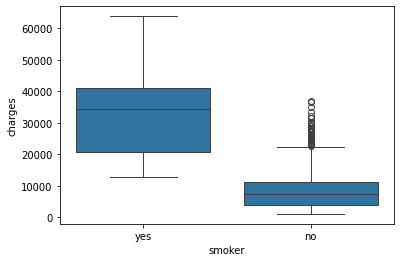

In [32]:
# Smoker

plt.show("Correlation of Smoker and Charges")
sns.boxplot(x=raw['smoker'], y=raw['charges'])
plt.show()

# Here we can see a very clear relationship between different values in the "smoker" column and varying values of "charges".
# We have 2 distinct values for "smoker" : yes and no. Records where the value of smoker is 'yes' have higher average
# values for charges as well as a large range of possible values. Record with a smoker value of 'no' have lower average
# values for charges. This relationship can be clearly seen with our box plots as the IQR or main box body of the 'yes'
# value for smoker is higher than that of "no". Since the main box body of the "no" value is smaller, we can say that the
# possible values for "charges" is more concentrated while the box of "yes" is longer meaning the inter-quartile range
# is wider.

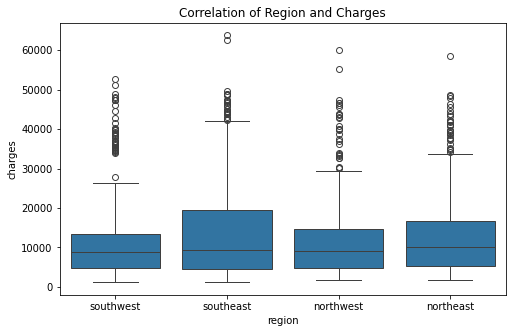

In [33]:
# Region

plt.figure(figsize=(8,5))
plt.title("Correlation of Region and Charges")
sns.boxplot(x=raw['region'], y=raw['charges'])
plt.show()

# If we include outliers, the range of possible values for "charges" is relatively the same regardless of "region" value.
# If we remove outliers, we can see that records with regions of "southeast" have a higher maximum charge value compared to 
# other regions. Records with a region of "northeast" can expect the next highest range for charges while "southwest" and
# "northwest" regions can expect relatively the same range of charge values. The main box body (IQR) of "southeast" is larger
# than other regions so it can be said that records with a region of "southeast" can expect higher average values for "charges"
# as well.

# Data Transformation

Now that we have visualized our features and observed their relationships with our target outcome, we need to further prepare our data to be compatible with our machine learning model. Since our target outcome ('charges') is a continuous variable (contains decimal values), we know we want to use some sort of Regression model. There are many types of Regression models that we can use such as a Linear model, Polynomial Model, or Random Forest Regressor but all of these models require our independent features to be of numeric data-types. A few of our features are already numeric like 'age' and 'bmi' but we also have categorical features such as 'smoker' and 'region' which have values in object form. Before feeding our data into a Regression model, we need to convert these categorical features to contain numeric values instead of strings.  
<br>
We can accomplish this goal in one of two ways. Option 1 is to use categorical codes to translate possible values of each feature into an integer. This is done with the ```pd.Series.cat.codes``` method but it has a major drawback. Using cat codes assigns each possible value (in each feature) an integer starting from 0 and incrementing by 1 for each subsequent value i.e. the values of the 'region' column might be converted as 'southwest'=0, 'southeast'=1, 'northwest'=2, and 'northeast'=3. While this method does accomplish our goal in converted the different values to numeric ones, it also implies an ordering of values. 0 is less than 1 and 1 is less than 2 but we can't say that a region of 'southwest' is _less than_ a region of 'southeast'. Unfortunately, our model would view the data in that way which would create an inaccurate relationship between values in each categorical feature.  
<br>
Our other option for converting categorical values is to use ```pd.get_dummies()```. This method creates new columns for every possible value of each categorical feature and then assigns those values to be either 0 or 1 to indicate the original value. To use our 'region' example, this method would break the feature into four columns: region_southwest, region_southeast, etc. If the 'region' value of a record was 'southeast', the value for that new column would be 1 while the other region columns would be 0. This allows us to convert our categorical data into numeric values without implying any unnecessary ordering between values. This method does have an issue where if a categorical feature has 50 possible values, 50 new columns would be created (now imagine if we have 20 of these features). Our dataset would become very complex and would need much more space to store the new data. This is a trade-off we need to think about when creating a Machine Learning model though (is a small improvement in our final models accuracy worth creating dozens if not hundreds of new features in our dataset).  
<br>
To address this problem, one might want to perform Principal Component Analysis (PCA) to drastically reduce the number of features in our dataset (with the cost of lower prediction accuracy). We won't be doing that in this project since we only have a few categorical columns each with a small number of possible values, but it is worth mentioning that these strategies exist to help resolve some of the issues being discussed here.  
<br>
We will begin the process of converting our categorical features to numeric ones by using ```pd.get_dummies()```.

In [34]:
# Identifying our features with the 'object' datatype.

raw.dtypes[raw.dtypes=='object']

sex       object
smoker    object
region    object
dtype: object

In [35]:
# Calling get_dummies on our entire dataframe is the same as calling it on each categorical column.
# We set drop_first to 'True' to remove the first dummy column of each converted feature. The intuition behind this is that
# only one dummy column per feature can have a value of 1. So, if we know the values of the other dummy columns to be 0, we 
# know the last dummy column must have a value of 1. This follow for any combination of values (0s or 1s). Our model will
# know this too so we can drop the first dummy column of each feature and save a little space in our dataset.
# This also prevents the 'Dummy Variable Trap' which is the unnecessary duplication of known information within our dataset.

raw = pd.get_dummies(raw, drop_first=True)

In [36]:
# Now that all of our columns contain numeric data, we can repeat .corr() like before but now we should see all columns.
# Correlation between features and target outcome (charges)

raw.corr()['charges'].drop('charges').sort_values(ascending=False)

# Like we predicted when viewing our visualizations, changes in 'smoker' values is highly correlated to changes in 'charges'.
# 'age' and 'bmi' also seem to have relatively important positive correlations. Some of our features actually have negative
# correlations with 'charges' All of the other features have relatively insignificant correlations compared to the top three.

smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64

In [37]:
# Absolute value correlation between features and target outcome (charges)

abs(pd.get_dummies(raw, drop_first=True).corr()['charges'].drop('charges')).sort_values(ascending=False)

# We also look at the absolute value correlations to get a better idea of the overall impact each feature has on 'charges'
# regardless of being positive or negative. It seems there isn't much change with our ordering here as the other features
# had very small correlation values already.

smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_southwest    0.043637
region_northwest    0.038695
Name: charges, dtype: float64

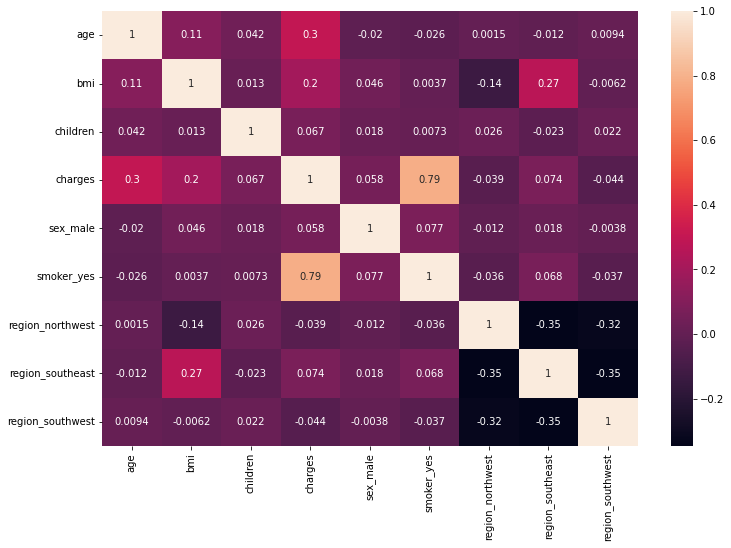

In [38]:
# Visualizing ALL correlations with a heatmap

plt.figure(figsize=(12,8))
sns.heatmap(pd.get_dummies(raw, drop_first=True).corr(), annot=True)
plt.show()

# This visualization helps us understand the correlations shared between ALL features (not just our target outcome).
# We don't gain a whole lot of new information here besides the fact that different regions are negatively correlated with
# each other (which makes sense since people can't live in two different regions). 

# Another interesting relationship we can see which we didn't know before was the relatively significant correlation between
# BMI and region_southeast. Remember before when we used a scatterplot to visualize BMI and Charges, we saw that there was
# a strange cluster of points near the top of the plot which we suggested was caused by interaction with another feature.
# It's possible that this relationship with a region value of "southeast" explains that cluster (also remember that a region
# value of 'southeast' had a larger range of possible charge values compared to other regions).

After completing this step, we now have all categorical features converted to numeric data. We are now ready to create our machine learning model and train it to (hopefully) make relatively accurate predictions. We were also able to visualize the correlations between all columns now that everything is numeric. We can assume that 'smoker', 'age', and 'bmi' features will likely have the most significant impact in our final model based on their high correlations with charges. After we create and optimize our model, we will look at the exact coefficients it assigned to each feature and see which ones it deemed to be most important (and least important) for making its predictions.

# Preprocessing

Now that all categorical features are converted to numeric values, it is time to create and train our Regression model. First, we need to separate our data into X (indepdent) and Y(dependent/target) feature sets. Next, we need to identify records that will be used to train and optimize our model, and records that will only be used for final model evaluation (we won't be able to adjust our model based on its predictions for these records). Lastly, we will scale our X features (normalizing the values due to varying value ranges and unit scales for each feature). After that, we will be ready to train our model.

## Separate into X and Y features

In [39]:
# Our X features will be all columns except for 'charges'

X = raw.drop('charges',axis=1)

In [40]:
# Our Y feature will be only the 'charges' column

y = raw['charges']

## Creating our Train Test Split

In [41]:
# Importing the necessary method

from sklearn.model_selection import train_test_split

In [42]:
# Separating our X and Y features into train and test record sets.
# Our test size will determine the percentage of records that will be held back for the test record set.
# We will be using GridSearch Cross Validation in our model training so this does not have to be as large.
# The random state is set to ensure the 'same' set of random records are separated for training and testing. This will be 
# important if we later want to train a different model in hopes of making more accurate predictions.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## Scale the X features

In [43]:
# Importing the correct scaler

from sklearn.preprocessing import StandardScaler

In [44]:
# Creating an instance of the Standard Scaler

scaler = StandardScaler()

In [45]:
# Fitting the scaler on our X_train dataset

scaler.fit(X_train)

StandardScaler()

In [46]:
# Transforming our X_train and X_test

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection

When creating a Linear Regression model, we need to avoid overfitting. Overfitting occurs when our model has high variance causing it to account for even the smallest changes in training values. This causes our model to perform extremely well in training but leads to poor performance when being tested (on data it has never seen before). A way to resolve this problem of overfitting is through Regularization. Regularization adds an extra penalty term to the model's loss function (which already attempts to minimize residual or distance from predictions and true values) known as the regularization term. This term changes depending on the type of regularization being either L1 (Lasso) or L2 (Ridge).  
<br>
L1 or Lasso Regularization penalizes the Regression model based on the absolute value of beta coefficients (the coefficients attached to each of our independent features in our model). This penalty simplifies our model by allowing beta coefficients to become 0 if the model deems them insignificant enough. The benefit of this type of regularization is simplifying our model but the drawback is it can completely ignore features which do have some small effect on our predictions (even if they are small they may not be worthless).
<br>
L2 or Ridge Regularization penalizes the Regression model based on the square of the beta coefficients attached to each feature. This type of regularization minimizes beta coeffecients and also creates simpler models but beta coefficients cannot become 0 here. This ensures that the effect of each feature is considered in our model but that comes with the possibility of including many additional features (adding complexity) even if they have very little impact on our final predictions.  
<br>
Rather than choosing between L1 or L2 Regularization, we can train an Elastic Net model and search for the optimal value of l1_ratio which gives our model the possibility of blending the benefits of both regularization types without the significant drawbacks of each.

## Creating our Elastic Net Model

In [47]:
# Importing our Elastic Net constructor

from sklearn.linear_model import ElasticNet

In [48]:
# We will only specify a value for max iterations and use GridSearch Cross Validation to find the optimal values of 
# l1_ratio and the penalty term for our model as a whole: alpha.

elastic_model = ElasticNet(max_iter=1000000)

In [49]:
# Creating our param_grid with values for alpha and l1_ratio
# Alpha values are typically arranged on a logarithmic scale between 0 and 100 but for this project we will choose a few values
# between 0.1 and 100. For l1_ratio, scikit-learns documentation suggests to choose values between 0 and 1 but lean more
# towards 1 (lasso regularization).


param_grid = {
    'alpha' : [0.1,1,5,10,50,100],
    'l1_ratio' : [.1,.5,.7,.95,.99,1]
}

## Optimizing Hyperparameters with GridSearchCV

In [50]:
# Importing GridSearchCV

from sklearn.model_selection import GridSearchCV

In [51]:
# Creating our grid model which will test our base Elastic Net model with each combination of alpha and l1_ratio in param_grid

grid_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [52]:
# Fitting our Grid Model (finding the optimal hyperparameters)

grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [53]:
# Displaying the best parameters found by our Grid Search

grid_model.best_params_

# Our grid model found that an alpha value of 100 and l1_ratio of 1 (purely Lasso Regularization) was best

{'alpha': 100, 'l1_ratio': 1}

In [54]:
# Seeing what coefficients our model performed best with

grid_model.best_estimator_.coef_

# Note that two of the coefficients became 0 which is a possibility with Lasso Regularization. This means that our model
# deemed their respective features to be insignificant in optimizing our loss function

array([3436.49350469, 1883.61579713,  446.86394228,   -0.        ,
       9421.35578697,   -0.        ,  -94.64467779,  -63.04729663])

In [55]:
# Displaying the coefficients given for each feature

coefficients = pd.Series(index = X.columns, data = grid_model.best_estimator_.coef_).sort_values(ascending=False)
coefficients

# As we predicted before 'smoker_yes', 'age', and 'bmi' all have high coefficients ('children' is relatively high as well).
# Our model giving 'sex_male' a coefficient of 0 implies that gender of a patient is a poor indicator of insurance costs.

smoker_yes          9421.355787
age                 3436.493505
bmi                 1883.615797
children             446.863942
sex_male              -0.000000
region_northwest      -0.000000
region_southwest     -63.047297
region_southeast     -94.644678
dtype: float64

In [56]:
# Displaying the absolute values of our feature coefficients

abs_coefficients = abs(coefficients).sort_values(ascending=False)
abs_coefficients

smoker_yes          9421.355787
age                 3436.493505
bmi                 1883.615797
children             446.863942
region_southeast      94.644678
region_southwest      63.047297
sex_male               0.000000
region_northwest       0.000000
dtype: float64

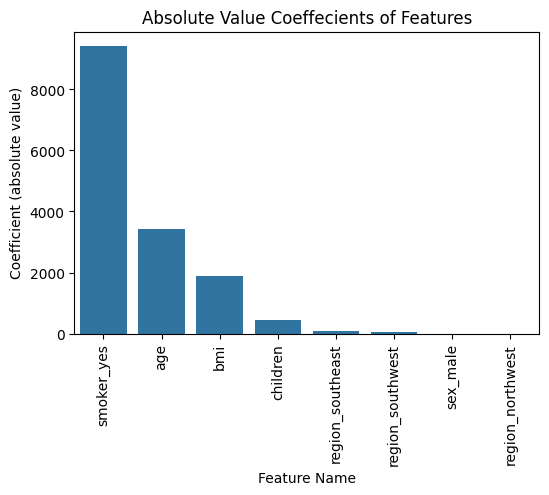

In [57]:
# Visualizing the absolute value feature coefficients

plt.figure(dpi=100)
plt.title('Absolute Value Coeffecients of Features')
sns.barplot(x=abs_coefficients.index, y=abs_coefficients.values)
plt.xticks(rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Coefficient (absolute value)')
plt.show()

# We can visually see that patients with a positive smoker status have the highest impact on insurance costs.

# Model Performance Evaluation

Now that we've searched for the optimal hyperparameters (if we wanted to we could do a more detailed search of alpha parameters between 50 and 100 but let's say we are satisfied with our model right now), it is time to give it our X_test data (which it has never seen before) and evaluate its performance in accurately predicting the appropriate values of 'charges'. For Regression models, this is done by reducing the Mean Absolute Error (the average absolute value error between predicted outcomes and true outcomes) and Root Mean Squared Error (same units as MAE but this metric penalizes a few very inaccurate predictions much more than MAE).

In [58]:
# Making our y predictions

y_pred = grid_model.predict(X_test)

In [59]:
# Importing our performance evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
# Calculating our MAE

MAE = mean_absolute_error(y_test, y_pred)
MAE

4351.718954689854

In [61]:
# Calculating our RMSE

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

6559.715600271675

In [62]:
# Calculating R-squared

RSquared = r2_score(y_test, y_pred)
RSquared

# Nearly 75% variance explained! Pretty good!

0.7459423182257465

## Explaining our Model Performance

In [63]:
# Statistical measures of our y_test (test 'charges') values

y_test.describe()

count      201.000000
mean     13899.714631
std      13046.736048
min       1121.873900
25%       4686.388700
50%       9625.920000
75%      18246.495500
max      63770.428010
Name: charges, dtype: float64

After making our predictions by feeding the X_test records into our model, we ARE NOT allowed to go back and tweak any parameters of our model. This would cause data leakage as we would be training our model to predict on data it shouldn't be able to see (simulated 'real-world' data after our model has been created). The predictions made by our model are only to be compared with the true values of y_test so we can evaluate our models overall performance when given previously unseen data.  
<br>
Our first performance metric was a Mean Absolute Error value of ~4351.72. This means that on average, the difference between our models predicted charges and the true value of charges is 4351.72. Is this good or bad? We would likely need to present our findings to a domain expert to help add context to these values but if we look at the statistical description of y_test above, we can see that the mean value for charge is ~13900 dollars. Compared to this value our MAE of 4351.72 dollars tells us that on average our predictions are inaccurate by ~31%. Since MAE measure the absolute value of the difference between predictions and true values, in this context we would be misrepresenting the true value of a patient's insurance cost by +/- 31%.  
<br>
Our second performance metric was a Root Mean Squared Error value of ~6559.72. RMSE penalizes high magnitudes of error more than MAE so it being somewhat far off from our MAE raises some concerns. In fact, the value of our model's RMSE represents 47% of the average value of charge in our y_test set. It is more difficult to extrapolate the significance of this value since the errors are squared first before being added and taking the root however, it indicates that there are a few instances where our model has larger inaccurate predictions than the average.

# Addressing Major Assumptions

Aside from examining the performance metrics of our model's predictions, there are also several assumptions that must be met to test the overall validity of applying a Multiple Linear Regression model to our dataset. If any of these assumptions fail, we might need to alter our data (through feature engineering) and retrain our model, or try a different Regression model altogether.

## Assumption 1: Our Target Outcome is a Continuous Variable

**TRUE**: Looking back at our EDA process, we saw that our target outcome feature - the 'charges' column - had a datatype of float. Typically, quantitative data that contains float values are referred to as continuous data while those that contain integers are discrete. While the definition of a contious variable is one that can be infinitely divided, measurements of money are typically viewed as continuous variables rather than discrete.

## Assumption 2: Linear Relationship between our DV and each IV

By definition, each of our dummy variable columns already satisfy this assumption so we just need to test our numeric features. Although our ordinal 'children' column is numeric, typically the distance between ordinal categories are unknown. In this case we decided to keep that feature as ordinal but we could have also expanded it into dummy columns like our other categorical features. If that were the case, the feature would already satisfy this assumption. Therefore, we will only observe the relationship of our two continous indepdent features {age, bmi} with our dependent feature 'charges'.

We already created both scatterplot visualizations during our Visualization process so we will just summarize the trends here.  
<br>
The relationship between 'age' and 'charges' appeared linear. Although we observed separated vertical clusters relating to 'charges', that does not violate the overall linear relationship between the two features. As 'age' increases, 'charges' appeared to increase at a relatively constant proportion.  
<br>
The linearity of 'bmi' and 'charges' is a little harder to discern. Points remain concentrated near 0 as 'bmi' increases but the range of possible 'charges' values also increase with 'bmi' causing more points to appear with positive values of 'charges'. We can still say the relationship is relatively linear (with the absence of more data to confirm or deny this) as there doesn't seem to be any clearly recognizable pattern illustrated by the visualization.  

Therefore, we can say that this assumption hold **true**.

## Assumption 3: No Multicollinearity

Specifically, this assumption relates to having no highly correlated pairs of independent features.

To test this assumption, we can inspect the correlation matrix for our independent features and look for correlations above 0.7 or we can calculate the Variance Inflation Factors (VIF) for each feature.

### Correlation Matrix Method

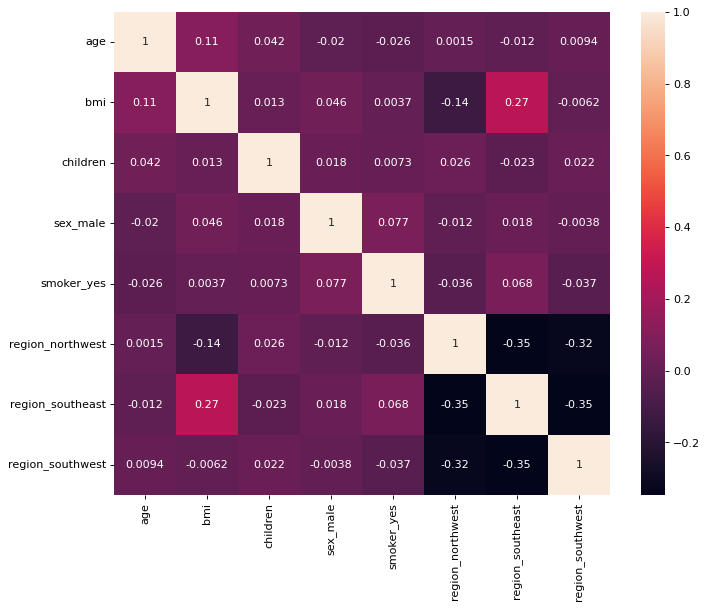

In [64]:
# Visualizing a correlation matrix for our independent features

plt.figure(figsize=(10,8), dpi=80)
sns.heatmap(raw.drop('charges', axis=1).corr(), annot=True)
plt.show()

# As we can see, no pairs of independent features have correlations above 0.7. The highest positive correlation we
# observe is between 'bmi' and 'region_southeast' with a correlation of 0.27.

### VIF Method

In [65]:
# Importing the necessary method

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
raw = raw.replace({False:0,True:1})

C:\Users\avina\AppData\Local\Temp\ipykernel_40360\1793749937.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw = raw.replace({False:0,True:1})


In [67]:
# VIF dataframe

vif_set = raw.drop('charges', axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = vif_set.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_set.values, i)
                          for i in range(len(vif_set.columns))]
  
vif_data.sort_values('VIF', axis=0, ascending=False)

,feature,VIF
1,bmi,11.359739
0,age,7.696862
6,region_southeast,2.265574
3,sex_male,2.001959
7,region_southwest,1.960750
5,region_northwest,1.888020
2,children,1.810971
4,smoker_yes,1.261476


There seems to be some disagreement as to what VIF value should be set as the lower limit for being "highly correlated". Some sources suggest a VIF value of 5 or greater while others suggest 10 or greater. Regardless of which value we choose for our limit, we can see that the VIF of our 'bmi' value is higher than both with a value of ~ 11.36. 'Age' is the second highest with a VIF value of ~ 7.697. This means our assumption of not having multicollinearity is **FALSE**.

## Assumption 4: Normal Distribution of Residual Errors

In [68]:
# Creating a series of residual errors

residuals = y_pred - y_test

### Histogram Method

For this method, we create a histogram with our list of residual values. We are looking for a bell-shaped curve that is relatively symmetric on both sides. It should be highest in the middle (at the mean/median/mode) and then taper off into tails in either side.

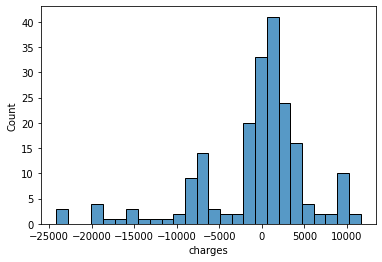

In [69]:
# Histogram

sns.histplot(residuals)
plt.show()

This distribution appears relatively normally distributed as there is a bell-shape however, there is a small bump on the left tail which is atypical in normal distributions. This leads us to suspect that our model failed this assumption but let's also create a Q-Q Plot to visualize the residual distribution through a different method.

### Q-Q Plot Method

A Q-Q Plot (Quantile-Quantile Plot) is used to determine if a data set adheres to a specific distribution. The red line indicates how a theoretical normally distributed data set would look while the blue dots show the distribution of our data set. Ideally, the blue dots should remain close to the red line (small deviations at the ends are acceptable though). If our dots do not remain close to the red line, it suggests that our data set does not adhere to the theoretical distribution we are testing it against.

In [70]:
# Importing the necessary method

from statsmodels.graphics.gofplots import qqplot

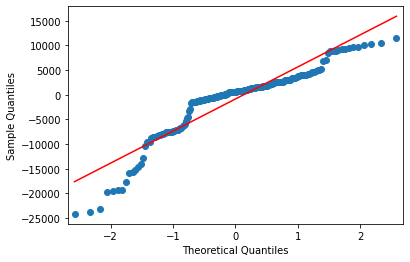

In [71]:
# Creating the visualization

qqplot(data=residuals, line='s')
plt.show()

We can see that our residuals deviate negatively from the theoretical distribution quite significantly at either end. Additionally, they deviate positively in the middle. Typically, we would expect a normally distributed data set to deviate slightly at the tails but not at all in the middle. Therefore, it seems our suspicions from our Histogram Method are confirmed and our residuals are not normally distributed. Our assumption is **False**.

## Assumption 5: Homoscedasticity

For this assumption, we are looking to see if the variance of our residuals remains releatively constant. We can test this by visualizing a scatterplot of our residuals for every predicted y_value. We should expect to see a relatively shapeless scatter of points across the x-axis. Shifts in residual variance (recognizable shapes such as bell or cone, or general changes in deviation) may be causes of concern.

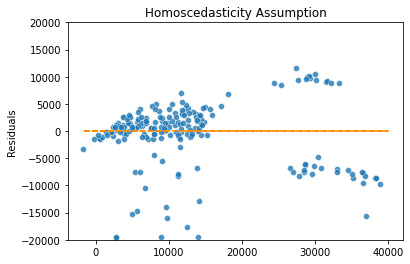

In [72]:
fig,ax = plt.subplots()
ax.set_title('Homoscedasticity Assumption')
sns.scatterplot(x=y_pred, y=residuals, alpha=0.8)
plt.plot(y_pred, np.zeros(len(y_pred)), linestyle="--", color="darkorange")
ax.set_ylabel('Residuals')
ax.set_ylim(bottom=-20000, top=20000)
plt.show()

Here we observe a few clusters of points which is more indicative of predicted value frequency than residual variance. If we observe the variance of the points we can see along the x-axis, we see points are relatively concentrated around the 0 line but also expand into dispersed negative values. Honestly, it is hard to tell if this violates our assumption of homoscedasticity because while the points are not as clustered on the right side, we have less points there in general. For now, we can probably say that our assumption holds **true** but more research is needed to definitively answer the question of homodescasticity in this dataset.

## Assumption 6: Independence of Errors

For our final assumption, we want to test that our errors in predicted values (residuals) are independent and not correlated with eachother. To test this we can calculate the Durbin-Watson statistic for our set of residuals. This statistic can take a value between 0 and 4 with a value of 2 meaning no correlation between residuals. A statistic closer to 0 suggests positive serial correlation while one closer to 4 suggests negative serial correlation. Generally, if the statistic falls between 1.5 and 2.5, the null hypothesis is not rejected meaning there is no significant correlation in our residuals.

In [73]:
# Importing the necessary method

from statsmodels.stats.stattools import durbin_watson

In [74]:
# Calculating the Durbin-Watson statistic

durbin_watson(residuals)

2.0009751588142577

We can see our calculated Durbin-Watson statistic is approximately 2.001 which is extremely close to 2 and definitely falls within our acceptable range for maintaining the null hypothesis. Therefore, we can say that there is correlation between our residuals or that our errors are independent meaning this assumption is **true**.

## Assumption Summary

Assumption 1: TRUE  
Assumption 2: TRUE  
Assumption 3: **FALSE**  
Assumption 4: **FALSE**  
Assumption 5:  TRUE  
Assumption 6: TRUE

After testing all major assumptions for Multiple Linear Regression, we see that two of them failed: No Multicolinearity and Normal Distribution of Residuals.  
<br>
We tested for Multicolinearity by calculating the correlations between all independent features and visualizing them with a heatmap. We didn't observe any correlations above 0.7 which is a general rule of thumb that our dataset lacks multicolinearity but we also calculated the Variance Inflation Factors for each feature just in case. After calculating those statistics, we saw that our 'age' and 'bmi' columns had VIF values greater than 7. Although sources disagree whether the acceptable lower limit for VIF is 5 or 10, our 'age' feature had a VIF value of 11 which violates both definitions.  
<br>
To test for the Normal Distribution of Residuals we visualized the residual for each predicted y-value using a Histogram. The distribution appeared relatively normal but the left side had a slight bump which is atypical of normally distributed datasets so we used a Q-Q plot to test the assumption further. In our Q-Q Plot, we observed deviation at either end as well as the middle of our plot which is atypical of normally distributed sets. Slight deviation at either end is generally acceptable but values near the center are generally expected to stay close to the theoretical fit line.
<br>
Since we failed one or more of the major assumptions for Multiple Linear Regression, it is evident that our model was not valid for predicting on our current data set. To address these issues, we would most likely have to produce interaction terms for our highly correlated independent features. After that, we would have to train and test our model again and re-evaluate its performance.

# Model Deployment

Although we found out that our Multiple Linear Regression model is not valid for our dataset in its current form, I will demonstrate how one would go about deploying their model so others can use it to make their own predictions.

## Dumping

In [75]:
# The first step is to recreate our desired model with the optimal hyperparameters we found through our GridSearchCV

final_model = ElasticNet(alpha=100, l1_ratio=1)

In [76]:
# Next we want to recreate our StandardScaler but this time fit and transform the ENTIRE X (now the entire X will be our 
# 'train' since we want our model to have as much information as possible to use in the real world)

final_scaler = StandardScaler()

In [77]:
# Now we are going to fit transform the entire X with our scaler

X_final = final_scaler.fit_transform(X)

In [78]:
# Now we are going to fit our ElasticNet model to our newly scaled X and the ENTIRE y 

final_model.fit(X_final,y)

ElasticNet(alpha=100, l1_ratio=1)

In [79]:
# Now we're going to use joblib to "dump" our final model, scaler, and column names

import joblib

In [80]:
# Dumping our final model

joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [81]:
# Dumping our Standard Scaler

joblib.dump(final_scaler, 'final_scaler.pkl')

['final_scaler.pkl']

In [82]:
# It's also considered good practice to dump the column names of the X features you used to fit the final model

joblib.dump(list(X.columns), 'final_column_names.pkl')

['final_column_names.pkl']

Now everything we need has been dumped and saved as .pkl files on our computer. If someone wanted to use our model to make their own predictions, we would just need to send them the files. After that, they could load up our model and make their predictions as follows.

## Loading

In [83]:
# New Person wants to know what values they should enter (what are our column names)

new_columns = joblib.load('final_column_names.pkl')
new_columns

['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [84]:
# Now they would load our model

loaded_model = joblib.load('final_model.pkl')

In [85]:
# And transform their desired values using our scaler
# We use double brackets because our model expects 1 or more rows of values. So we input an entire row as the first index.

sample_data = pd.DataFrame([[35,18.5,0,1,0,0,0,0]], columns = new_columns)

new_scaler = joblib.load('final_scaler.pkl')
sample_data = new_scaler.transform(sample_data)

In [86]:
# Finally they would enter the scaled values for each feature and predict using our model


# Making predictions using hypothetical values
loaded_model.predict(sample_data)

array([3328.66809691])

This means that the final version of our Multiple Linear Regression model, which was fit on our entire independent feature dataset, predicts that a patient with the attributes provided in sample_data will have an insurance cost of approximately $3328.67.

# Next Steps

If I was to expand on this project in the future, I would like to...
* Create a better performing Regression model which addresses the issues found in our major assumption tests
* Learn a bit more about how to test the various major assumptions (some of them could be tested in multiple ways and I want a better understanding of the benefits and drawbacks of using each method)
* Learn how to deploy my final model using an API or software rather than requiring a new user to use Python.